In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [3]:
import os
print(os.listdir("F:/UTD Drive/OneDrive - The University of Texas at Dallas/UTD/Semester 3/Database Marketing/Project"))

['BlackFriday.csv', 'test.csv', 'train.csv']


In [21]:
os.chdir("F:/UTD Drive/OneDrive - The University of Texas at Dallas/UTD/Semester 3/Database Marketing/Project")
BF = pd.read_csv("train.csv")


In [180]:
BF_test = pd.read_csv("test.csv")

In [182]:
BF_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [9]:
BF.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
BF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [23]:
## to check which columns have null values.

#BF.isna().sum()

missing_values = BF.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/BF.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.672659
Product_Category_2    31.566643
dtype: float64 %


In [24]:
print('Product_Category_1', BF['Product_Category_1'].unique())
print('Product_Category_2', BF['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', BF['Product_Category_3'].unique())

Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
-----------------------------------------------------------------------------------
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [25]:

df = BF.fillna(value=0)

df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)

print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


In [189]:
# Info about Shoppers
print('Number of shoppers:',df['User_ID'].nunique())
print('Years in city:',df['Stay_In_Current_City_Years'].unique())
print('Age Groups:',df['Age'].unique())
print('Gender', df['Gender'].unique())
print('Occupation', df['Occupation'].unique())
print('City_Category', df['City_Category'].unique())
print('Marital_Status', df['Marital_Status'].unique())

Number of shoppers: 5891
Years in city: ['2' '4+' '3' '1' '0']
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Gender ['F' 'M']
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ['A' 'C' 'B']
Marital_Status [0 1]


In [54]:
# Info about products
print('Number of products:',df['Product_ID'].nunique())
print('Number of categories:',df['Product_Category_1'].unique().max())
print('Highest and lowest purchase:',df['Purchase'].max(),',',df['Purchase'].min())

Number of products: 3631
Number of categories: 20
Highest and lowest purchase: 23961 , 12


In [78]:
male_count = df[df['Gender']=='M'].count()[0]
Female_count = df[df['Gender']=='F'].count()[0]
print('Total Male',male_count)
print('Total Female',Female_count)

Total Male 414259
Total Female 135809


([<matplotlib.patches.Wedge at 0x18ecdfc6860>,
 [Text(0.0548817,1.09863,'Male'), Text(-0.0548817,-1.09863,'Female')],
 [Text(0.0299355,0.599253,'48.4%'), Text(-0.0299355,-0.599253,'51.6%')])

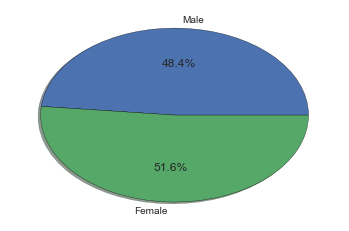

In [118]:
plt.pie(df.groupby('Gender')['Product_ID'].nunique(),labels = ('Male','Female'),shadow=True, autopct='%1.1f%%')

#Although almost even, women did purchase a slightly wider array of products than men did. 
#Now, lets analyze the proportions of each gender's purchase in terms of the product categories:

In [102]:
sns.set(style='darkgrid')
plt.rcParams["patch.force_edgecolor"] = True

gender_M = df[df['Gender']=='M'][['Product_Category_1','Gender']].groupby('Product_Category_1').count()
gender_F = df[df['Gender']=='F'][['Product_Category_1','Gender']].groupby('Product_Category_1').count()

cat_bygender = pd.concat([gender_M,gender_F],axis=1)
cat_bygender.columns = ['M ratio','F ratio']

cat_bygender['M ratio'] = cat_bygender['M ratio']/df[df['Gender']=='M'].count()[0]
cat_bygender['F ratio'] = cat_bygender['F ratio']/df[df['Gender']=='F'].count()[0]

# Create likelihood of one gender to buy over the other
cat_bygender['Likelihood (M/F)'] = cat_bygender['M ratio']/cat_bygender['F ratio']

cat_bygender['Total Ratio'] = cat_bygender['M ratio']+cat_bygender['F ratio']

cat_bygender.sort_values(by='Likelihood (M/F)',ascending=False)


#This table tells us a lot about how likely a type of product is to be bought in regards of gender. 
#For instance, men are almost 3 times as likely to buy an item in category 17, 
#while women are almost 2 times as likely to buy a product in category 14.

,M ratio,F ratio,Likelihood (M/F),Total Ratio
Product_Category_1,,,,
17,0.001246,0.000457,2.728441,0.001702
18,0.006621,0.002813,2.354068,0.009434
15,0.012659,0.007702,1.643568,0.020361
9,0.000821,0.000515,1.592346,0.001336
1,0.278925,0.182838,1.525531,0.461762
11,0.047188,0.034895,1.352297,0.082082
6,0.038399,0.033569,1.143866,0.071968
10,0.009566,0.008556,1.118084,0.018123
2,0.043948,0.041661,1.054892,0.085610


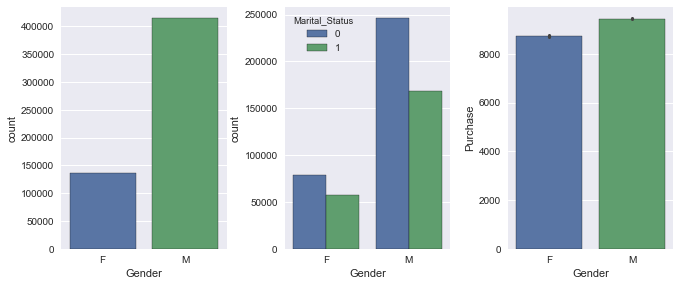

In [112]:
plt.figure(figsize=(10,4))  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(1, 3, 1) # (rows, columns, panel number)
sns.countplot(df['Gender'])

plt.subplot(1, 3, 2)
sns.countplot(df['Gender'],hue=df['Marital_Status'])

# create the second panel and set current axis
plt.subplot(1, 3, 3)
df[['Gender','Purchase']].groupby('Gender').mean()
sns.barplot('Gender', 'Purchase', data = df)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

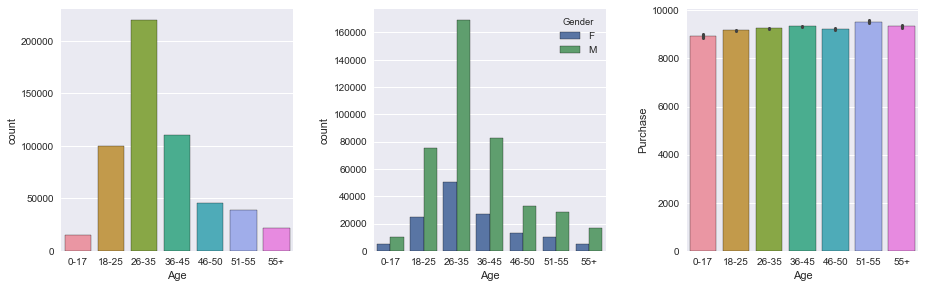

In [148]:
plt.figure(figsize=(14,4))  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(1, 3, 1) # (rows, columns, panel number)
sns.countplot(df['Age'].sort_values())

# create the second panel and set current axis
plt.subplot(1, 3, 2)
sns.countplot(df['Age'].sort_values(),hue=df['Gender'])

plt.subplot(1, 3, 3)
#df[['Age','Purchase']].groupby('Age').sum()
sns.barplot(df['Age'].sort_values(), 'Purchase', data = df)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()



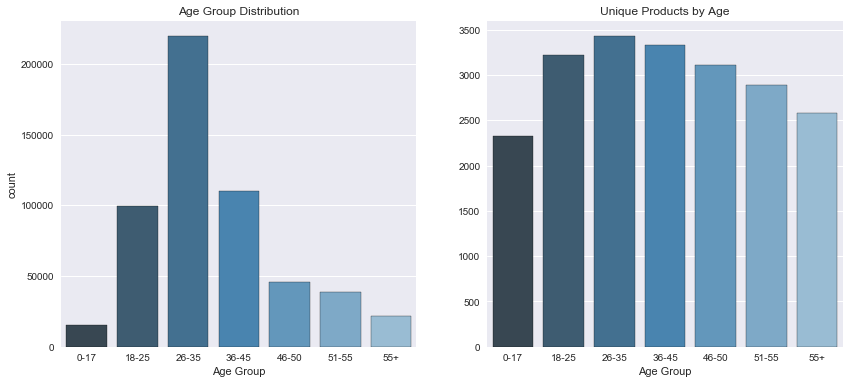

In [140]:
prod_byage = df.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax = ax.ravel()

sns.countplot(df['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

#It's quite apparent that the largest age group amongst the customers is 26-35. 
#Interestingly, the distribution of product purchase, in terms of quantity, does not vary greatly amongst the age groups. 
#This means that,though the 26-35 age group is the most popular,the other age groups purchase almost as many unique items as them 
#But does this mean that the amount of money spent amongst the age groups is the same

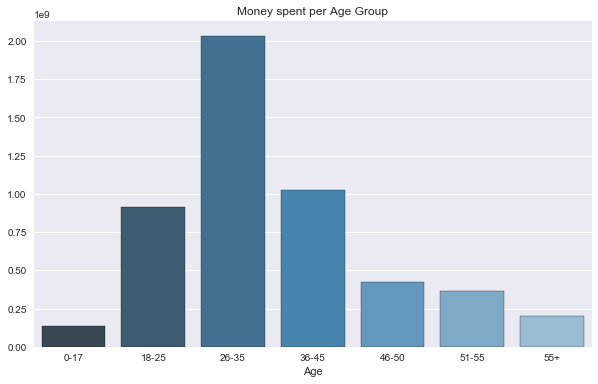

In [149]:
spent_byage = df.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(10,6))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Blues_d")
plt.title('Money spent per Age Group')
plt.show()

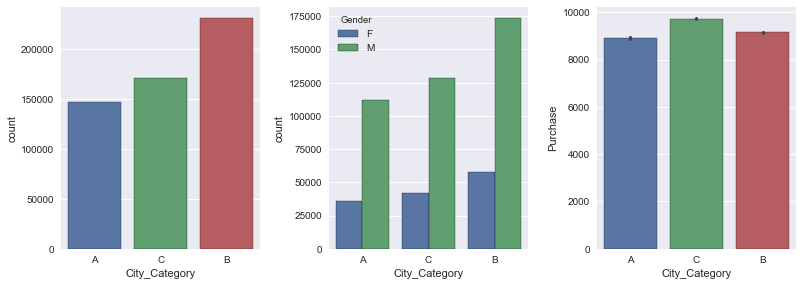

In [109]:
plt.figure(figsize=(12,4))  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(1, 3, 1) # (rows, columns, panel number)
sns.countplot(df['City_Category'])

# create the second panel and set current axis
plt.subplot(1, 3, 2)
sns.countplot(df['City_Category'],hue=df['Gender'])

plt.subplot(1, 3, 3)
df[['City_Category','Purchase']].groupby('City_Category').mean()
sns.barplot('City_Category', 'Purchase', data = df)


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

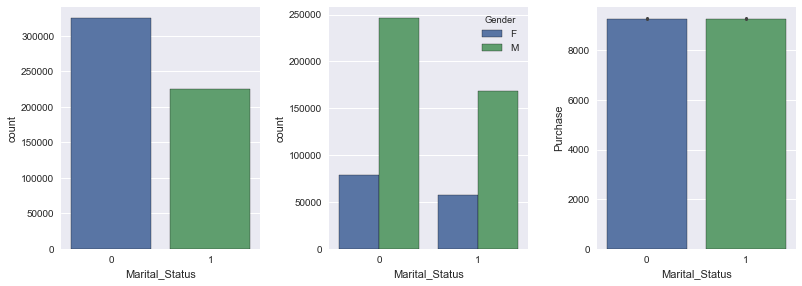

In [113]:
plt.figure(figsize=(12,4))  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(1, 3, 1) # (rows, columns, panel number)
sns.countplot(df['Marital_Status'])

plt.subplot(1, 3, 2)
sns.countplot(df['Marital_Status'],hue=df['Gender'])

# create the second panel and set current axis
plt.subplot(1, 3, 3)
df[['Marital_Status','Purchase']].groupby('Marital_Status').mean()
sns.barplot('Marital_Status', 'Purchase', data = df)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

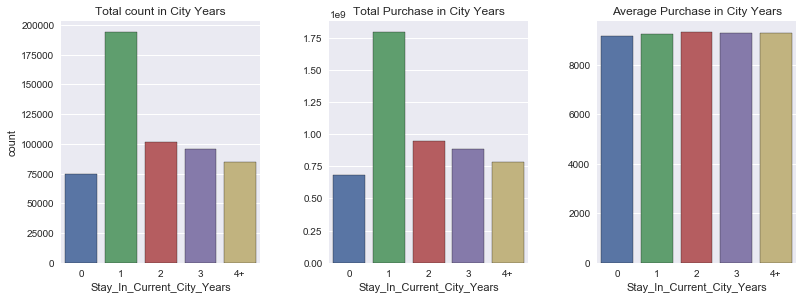

In [177]:
plt.figure(figsize=(12,4))  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(1, 3, 1) # (rows, columns, panel number)
sns.countplot(df['Stay_In_Current_City_Years'].sort_values())
plt.title('Total count in City Years')

# create the second panel and set current axis
plt.subplot(1, 3, 2)
Purchase_by_Stay = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()
sns.barplot(x=Purchase_by_Stay.index, y=Purchase_by_Stay.values)
plt.title('Total Purchase in City Years')
#sns.barplot(df['Stay_In_Current_City_Years'].sort_values(), 'Purchase', data = df)

plt.subplot(1, 3, 3)
Pur_mean_by_Stay = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
sns.barplot(x=Pur_mean_by_Stay.index, y=Pur_mean_by_Stay.values)
plt.title('Average Purchase in City Years')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

In [65]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


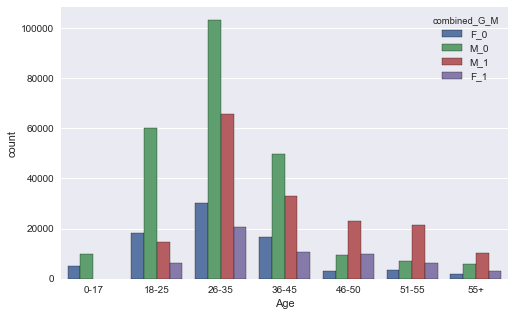

In [116]:
plt.figure(figsize=(8,5))
sns.countplot(df['Age'].sort_values(),hue=df['combined_G_M'])

In [ ]:
# As we see above, there are no bars for the married in the 0-17 range which makes sense. 
#And then if we look at the 46 and above groups, females are very less. 
#But on the other hand, married males paying in range 46-55 are also comparatively more than married females. 
#So it could also imply that though ladies do shop a lot, 
#their spouses are possibly paying for it and hence data reflects that men shopped more. 
#If we had more categorical data defining what kind of products were purchased by men, 
#we could dig in this statement further. 
#However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

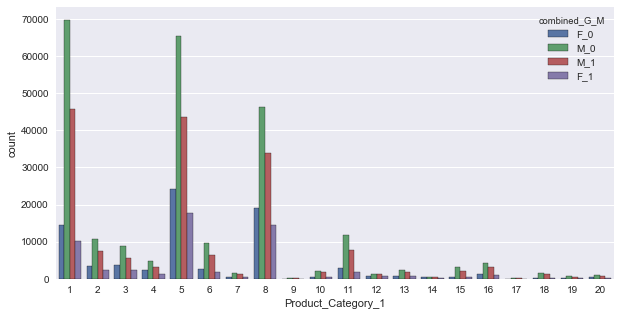

In [117]:
plt.figure(figsize=(10,5))
sns.countplot(df['Product_Category_1'],hue=df['combined_G_M'])

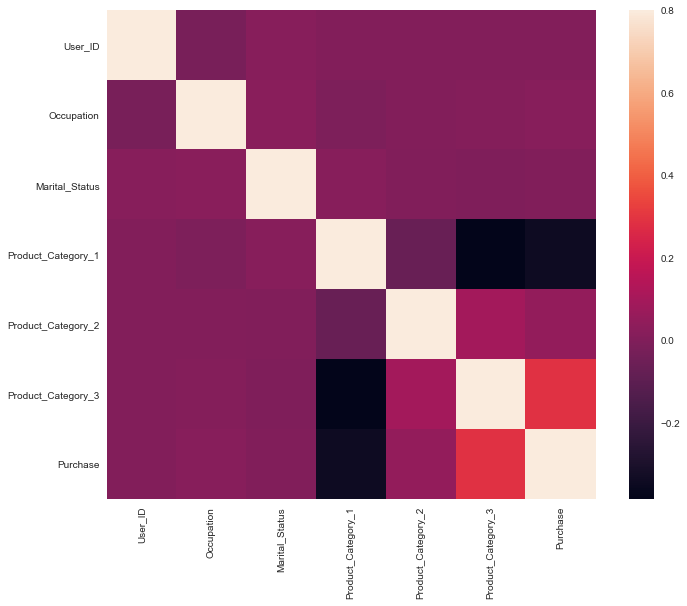

In [115]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [75]:
# def map_gender(gender):
#     if gender == 'M':
#         return 1
#     else:
#         return 0
# data['Gender'] = data['Gender'].apply(map_gender)

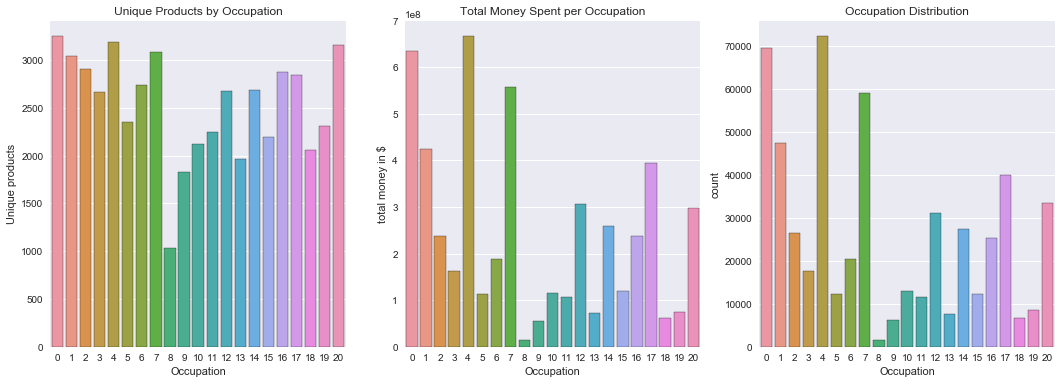

In [164]:
fig,ax = plt.subplots(1,3,figsize=(18,6))
ax = ax.ravel()

prod_by_occ = df.groupby('Occupation')['Product_ID'].nunique()
#prod_by_occ = df.groupby(by='Occupation').nunique()['Product_ID']

sns.barplot(x=prod_by_occ.index,y=prod_by_occ.values,ax=ax[0])
ax[0].set_title('Unique Products by Occupation')
ax[0].set_xlabel('Occupation')
ax[0].set_ylabel('Unique products')

spent_by_occ = df.groupby(by='Occupation').sum()['Purchase']
sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values,ax=ax[1])
ax[1].set_title('Total Money Spent per Occupation')
ax[1].set_xlabel('Occupation')
ax[1].set_ylabel('total money in $')

sns.countplot(df['Occupation'],ax=ax[2])
ax[2].set_title('Occupation Distribution')
ax[2].set_xlabel('Occupation')

plt.show()

#Once again, the distribution of the mean amount spent within each occupation appears to mirror the distribution 
#of the amount of people within each occupation. 
#This is fortunate from a data science perspective, as we are not working with odd or outstanding features. 
#Our data, in terms of age and occupation seems to simply make sense.

In [ ]:
#Here we explore the products themselves. This is important, as we do not have labeled items in this dataset. 
#Theoretically, a customer could be spending $5,000 on 4 new TVs, or 10,000 pens. 
#This difference matters for stores, as their profits are affected. 
#Since we do not know what the items are, let's explore the categories of the items.


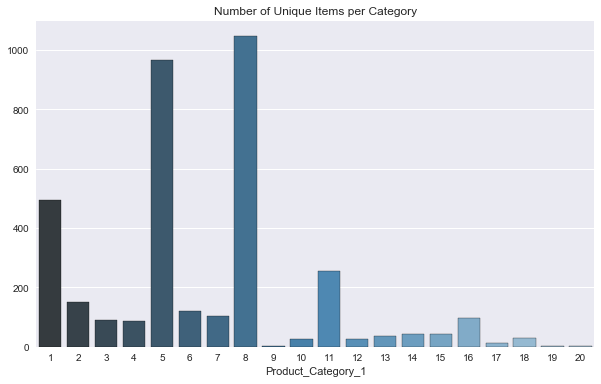

In [165]:
plt.figure(figsize=(10,6))
prod_by_cat = df.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette="Blues_d")
plt.title('Number of Unique Items per Category')
plt.show()

#Category labels 1, 5, and 8 clearly have the most items within them. 
#This could mean the store is known for that item, or that the category is a broad one.

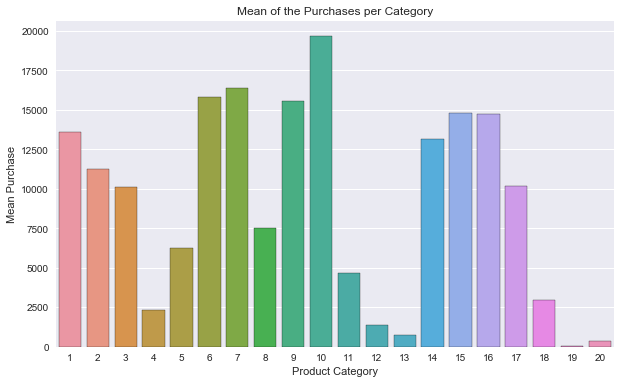

In [169]:
plt.figure(figsize=(10,6))
Mean_Purchase_by_Cat1 = df.groupby('Product_Category_1')['Purchase'].mean().round(2)
sns.barplot(x=Mean_Purchase_by_Cat1.index,y=Mean_Purchase_by_Cat1.values)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

#Interestingly enough, our most popular categories are not the ones making the most money. 
#This appears to be a big store, and they may be aware of this. 
#Yet this same form of analysis can be used in the case of a smaller store that might not be aware, and it could be very useful.

In [185]:

###############################
df_new = df.drop(['Product_ID','Product_Category_2', 'Product_Category_3','combined_G_M'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int64(5), object(4)
memory usage: 37.8+ MB


In [207]:
demography = df_new.groupby(by=["User_ID",
                            "Age",
                            "Gender",
                            "Occupation",
                            "Marital_Status",
                            "City_Category",
                            "Stay_In_Current_City_Years"
                           ]).sum()["Purchase"].to_frame()
demog = demography.reset_index()
demog.head()
#demog = demog.set_index("User_ID")

,User_ID,Age,Gender,Occupation,Marital_Status,City_Category,Stay_In_Current_City_Years,Purchase
0,1000001,0-17,F,10,0,A,2,334093
1,1000002,55+,M,16,0,C,4+,810472
2,1000003,26-35,M,15,0,A,3,341635
3,1000004,46-50,M,7,1,B,2,206468
4,1000005,26-35,M,20,1,A,1,821001


In [206]:
UserID_Count = df_new.groupby(by=["User_ID",
                            "Age",
                            "Gender",
                            "Occupation",
                            "Marital_Status",
                            "City_Category",
                            "Stay_In_Current_City_Years"
                           ]).size()
#UserID_Count.head()
new_count = UserID_Count.to_frame(name = 'count').reset_index()
new_count.head()

,User_ID,Age,Gender,Occupation,Marital_Status,City_Category,Stay_In_Current_City_Years,count
0,1000001,0-17,F,10,0,A,2,35
1,1000002,55+,M,16,0,C,4+,77
2,1000003,26-35,M,15,0,A,3,29
3,1000004,46-50,M,7,1,B,2,14
4,1000005,26-35,M,20,1,A,1,106


In [218]:
Final = pd.merge(demog, new_count[['User_ID','count']], how='left', on=['User_ID'])
Final = Final.set_index("User_ID")

#Final = demog.join(new_count[new_count['User_ID','count']], on=['User_ID'])
#Final1 = Final.sort_values(by='Purchase', ascending=False)
Final.head(10)

,Age,Gender,Occupation,Marital_Status,City_Category,Stay_In_Current_City_Years,Purchase,count
User_ID,,,,,,,,
1000001,0-17,F,10,0,A,2,334093,35
1000002,55+,M,16,0,C,4+,810472,77
1000003,26-35,M,15,0,A,3,341635,29
1000004,46-50,M,7,1,B,2,206468,14
1000005,26-35,M,20,1,A,1,821001,106
1000006,51-55,F,9,0,A,1,379930,47
1000007,36-45,M,1,1,B,1,234668,17
1000008,26-35,M,12,1,C,4+,796593,77
1000009,26-35,M,17,0,C,0,594099,58


In [221]:
age_dummies = pd.get_dummies(Final["Age"])

occupation_dummies = pd.get_dummies(Final["Occupation"])

city_dummies = pd.get_dummies(Final["City_Category"])

city_stay_years_dummies = pd.get_dummies(Final["Stay_In_Current_City_Years"])

city_stay_years_dummies.columns = ["0yrs","1yrs","2yrs","3yrs","4+yrs"]

Final["Gender"] = Final["Gender"].apply(lambda gender: 1 if gender =="F" else 0)

In [231]:
Final_data = pd.concat([Final["Gender"],
                        Final["Marital_Status"],
                        age_dummies,
                        occupation_dummies,
                        city_dummies,
                        city_stay_years_dummies,
                        Final['count'],
                        Final["Purchase"]
                       ],axis=1)

Final_data = Final_data.drop(["0-17",0,"C","4+yrs"],axis=1)
Final_data.head()

,Gender,Marital_Status,18-25,26-35,36-45,46-50,51-55,55+,1,2,...,19,20,A,B,0yrs,1yrs,2yrs,3yrs,count,Purchase
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,35,334093
1000002,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,77,810472
1000003,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,29,341635
1000004,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,14,206468
1000005,0,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,106,821001


In [232]:
from sklearn.model_selection import train_test_split

X = Final_data.iloc[:,:-1]
Y = Final_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [233]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=["Coeff"])

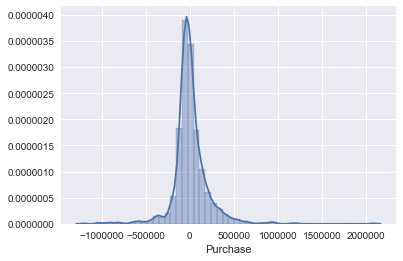

In [234]:
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions))

In [235]:
from sklearn import metrics
metrics.r2_score(y_true=y_test,y_pred=predictions)

0.9618335537590231

In [236]:
import statsmodels.api as sm
from scipy import stats

est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     5219.
Date:                Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                        01:58:41   Log-Likelihood:                -55841.
No. Observations:                4123   AIC:                         1.118e+05
Df Residuals:                    4088   BIC:                         1.120e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender         -6.711e+04   6705.423    -10.

In [266]:
import xgboost as xgb

Age_Groups_Matrix = model.matrix(~Age-1,data = df_new)


NameError: name 'model' is not defined

In [260]:
!pip install xgboost

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
